##### F.	Use the Mobile price prediction dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

##### i.	Download the dataset from above link and load it into your Python environment.

In [3]:
df=pd.read_csv("Cellphone.csv")
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


##### ii.	Perform the EDA and do the visualizations.

In [4]:
df.drop(columns="Product_id",inplace=True)

In [5]:
df.rename(columns={"resoloution":"resolution"},inplace=True)

In [6]:
df.head()

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resolution    161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [8]:
df.shape

(161, 13)

In [9]:
df.columns

Index(['Price', 'Sale', 'weight', 'resolution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

In [10]:
df.describe().round(3)

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000,161.000,161.000,161.00,161.000,161.000,161.000,161.000,161.000,161.000,161.000,161.000,161.000
mean,2215.596,621.466,170.426,5.21,335.056,4.857,1.503,24.502,2.205,10.378,4.503,2842.112,8.922
std,768.187,1546.619,92.889,1.51,134.827,2.444,0.600,28.805,1.610,6.182,4.342,1366.991,2.193
min,614.000,10.000,66.000,1.40,121.000,0.000,0.000,0.000,0.000,0.000,0.000,800.000,5.100
25%,1734.000,37.000,134.100,4.80,233.000,4.000,1.200,8.000,1.000,5.000,0.000,2040.000,7.600
50%,2258.000,106.000,153.000,5.15,294.000,4.000,1.400,16.000,2.000,12.000,5.000,2800.000,8.400
75%,2744.000,382.000,170.000,5.50,428.000,8.000,1.875,32.000,3.000,16.000,8.000,3240.000,9.800
max,4361.000,9807.000,753.000,12.20,806.000,8.000,2.700,128.000,6.000,23.000,20.000,9500.000,18.500


In [11]:
df.isnull().sum()

Price           0
Sale            0
weight          0
resolution      0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [12]:
df.value_counts()

Price  Sale  weight  resolution  ppi  cpu core  cpu freq  internal mem  ram    RearCam  Front_Cam  battery  thickness
614    2159  69.8    1.40        129  0         0.000     0.000         0.004  0.0      0.0        800      14.1         1
       2171  69.8    1.40        129  0         0.000     0.000         0.004  0.0      0.0        800      14.1         1
628    1224  102.9   2.20        128  0         0.000     0.256         0.128  1.3      0.0        950      18.5         1
       1274  102.9   2.20        128  0         0.000     0.256         0.128  1.3      0.0        950      18.5         1
705    423   110.0   2.20        128  0         0.000     0.128         0.032  2.0      0.0        900      15.6         1
                                                                                                                        ..
3658   52    168.0   5.15        428  8         2.450     64.000        6.000  12.0     8.0        3350     7.5          1
3837   111   167.8   

In [13]:
corr=df.corr()
corr

,Price,Sale,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resolution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
RearCam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

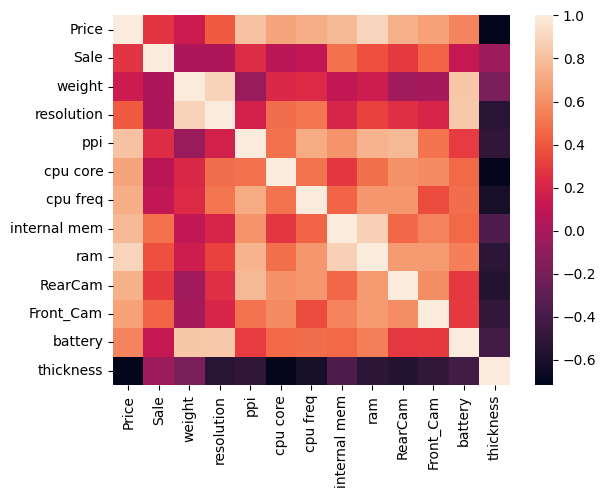

In [15]:
sns.heatmap(corr)
plt.show()

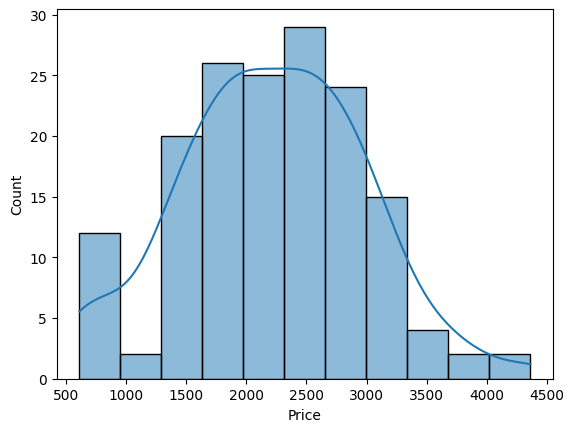

In [16]:
sns.histplot(df["Price"],kde=True)
plt.show()

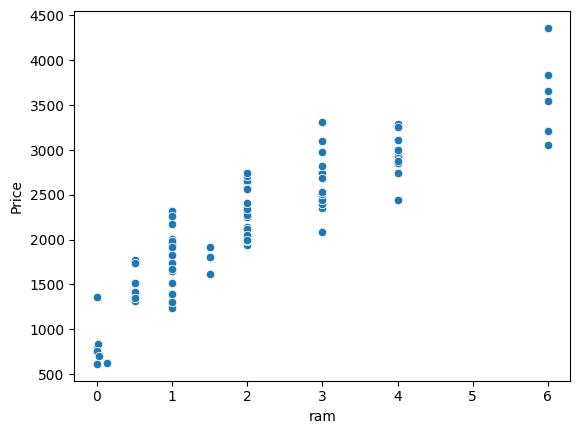

In [17]:
sns.scatterplot(data=df,x="ram",y="Price")
plt.show()

##### iii.	Check the distributions/skewness in the variables and do the transformations if required.

In [18]:
cols=df.columns
for i in cols:
    skewed=df[i].skew()
    print(i," : ",skewed)

Price  :  0.05234678230116894
Sale  :  4.2693840983179445
weight  :  3.981756060198998
resolution  :  1.1761101196508716
ppi  :  0.6025028092508479
cpu core  :  -0.009077116452651475
cpu freq  :  -0.5126630811185897
internal mem  :  2.3896825866645997
ram  :  0.7926980073740476
RearCam  :  0.1069292938431428
Front_Cam  :  1.1697495413305683
battery  :  2.0926598466076736
thickness  :  1.5876799080340545


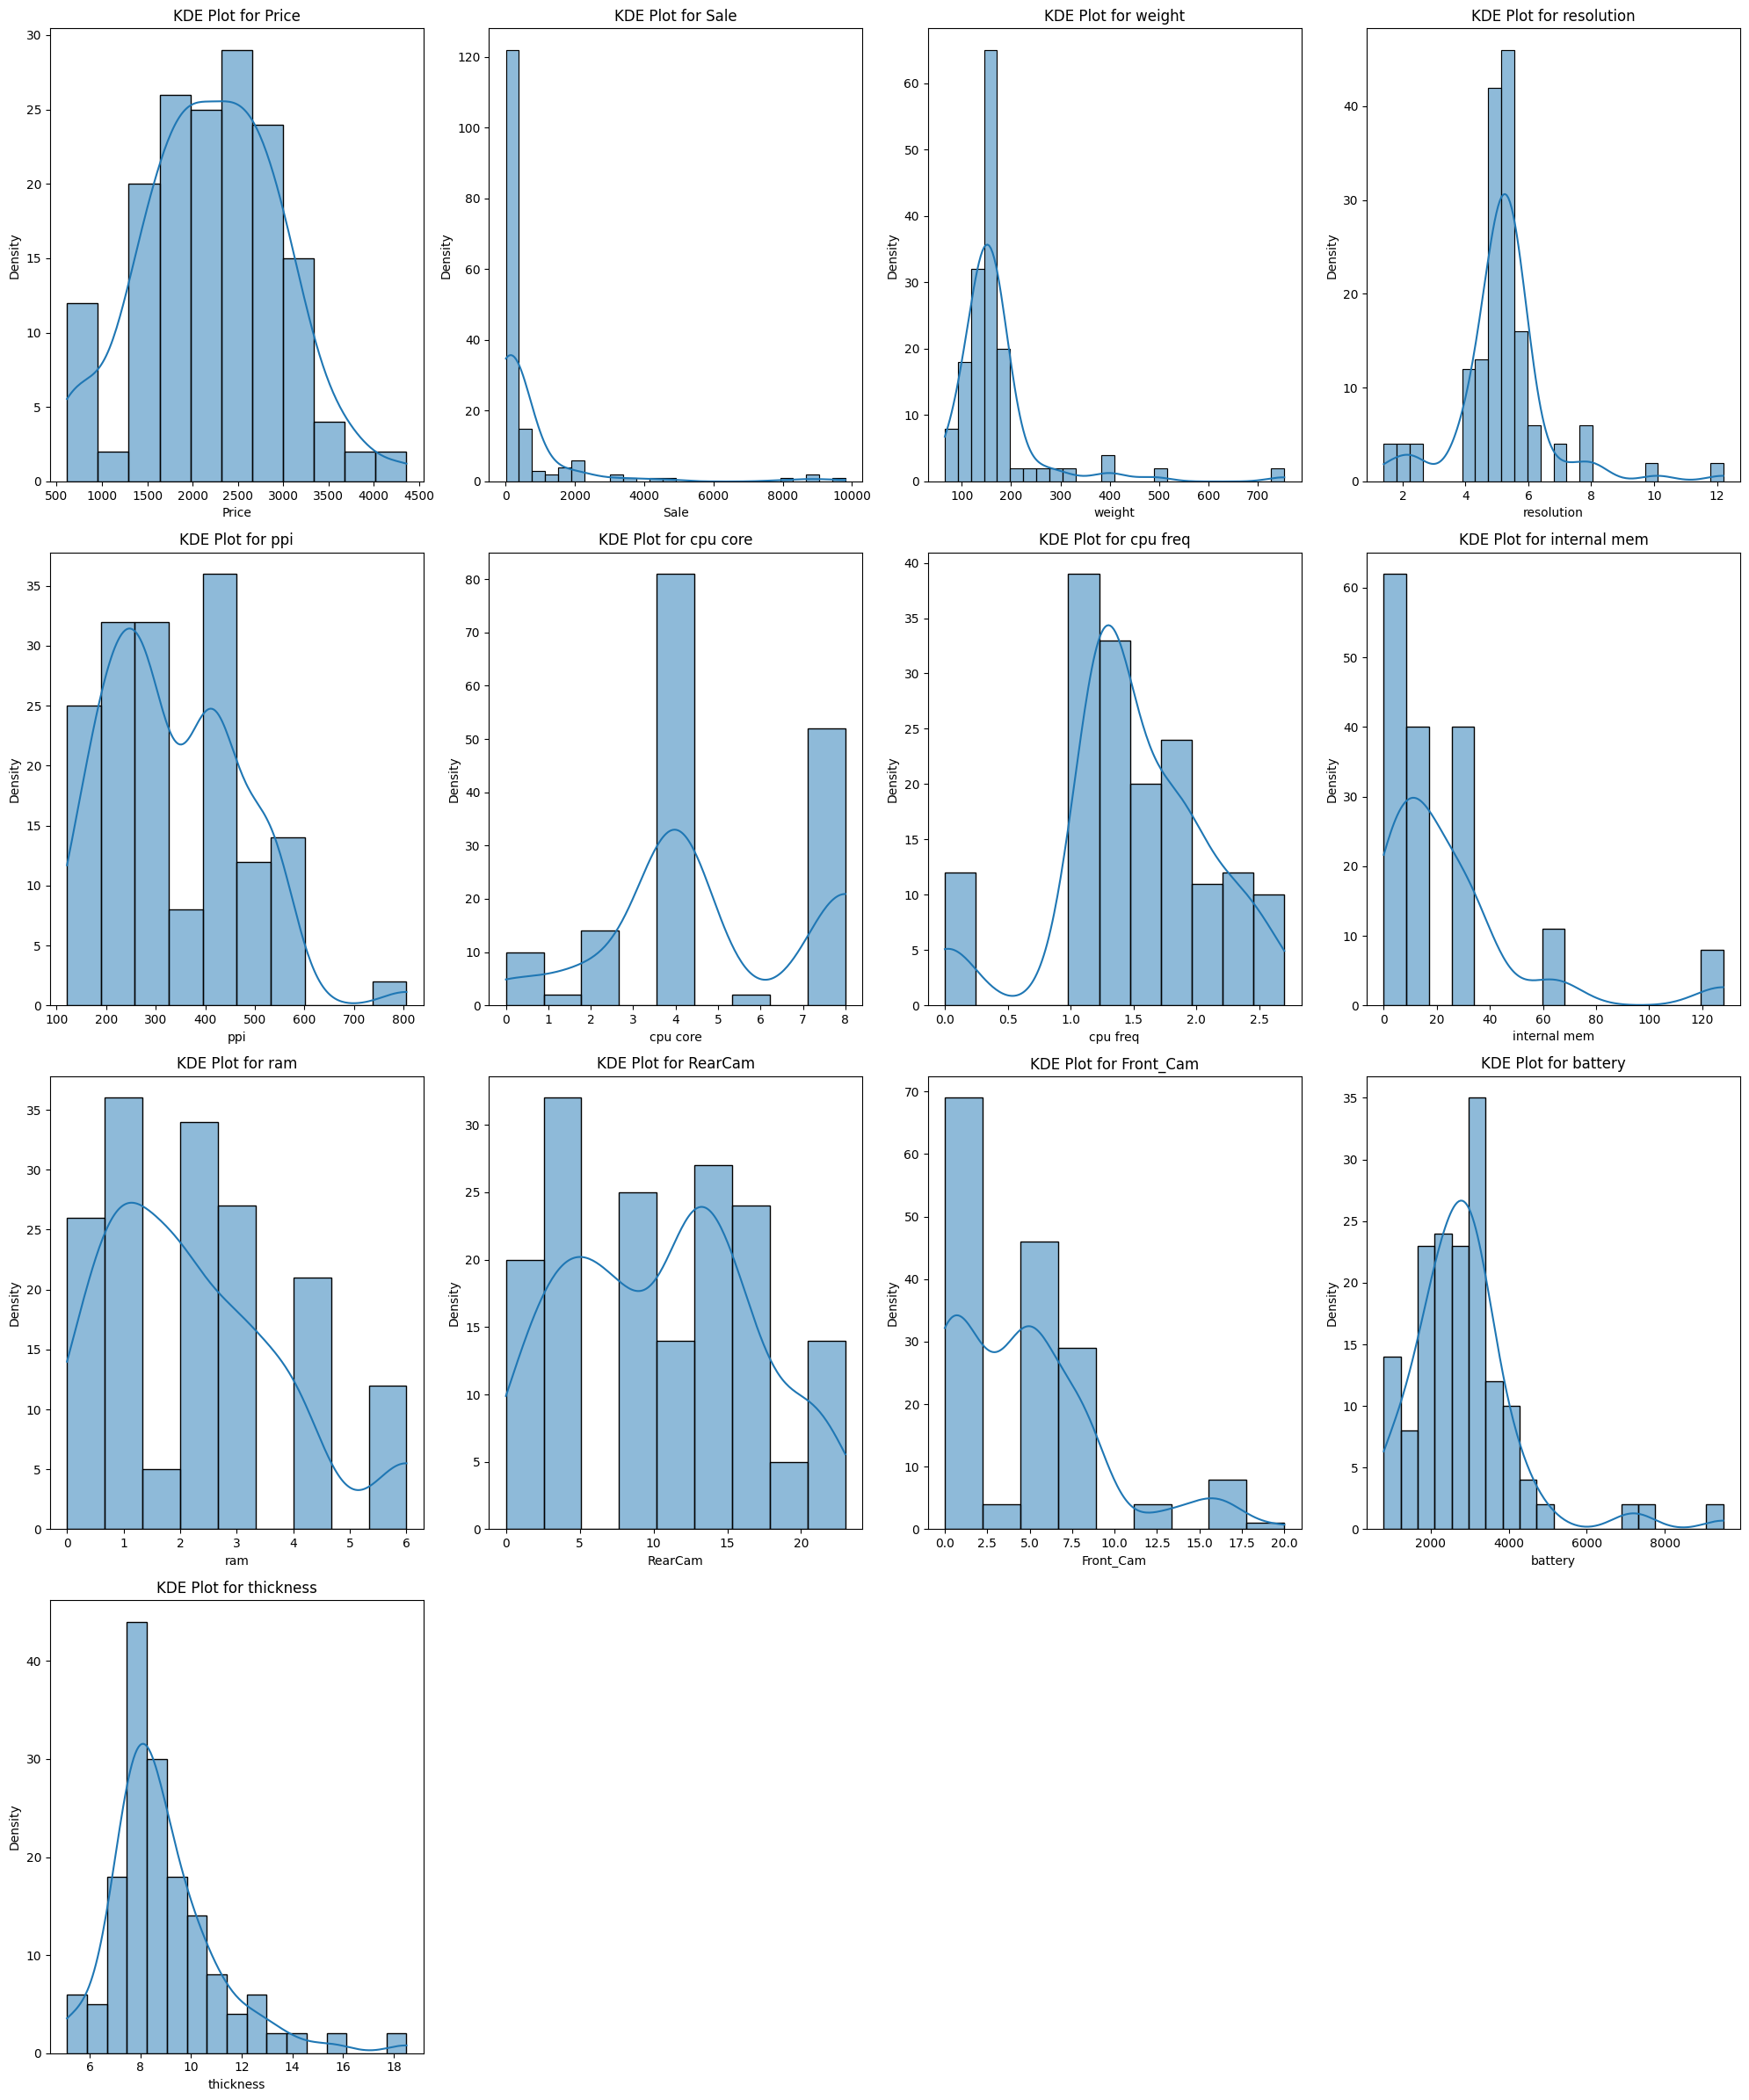

In [19]:
plt.figure(figsize=(20, 24))
for col in df.columns:
    plt.subplot(4,4,df.columns.get_loc(col) + 1)
    sns.histplot(df[col],kde=True)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

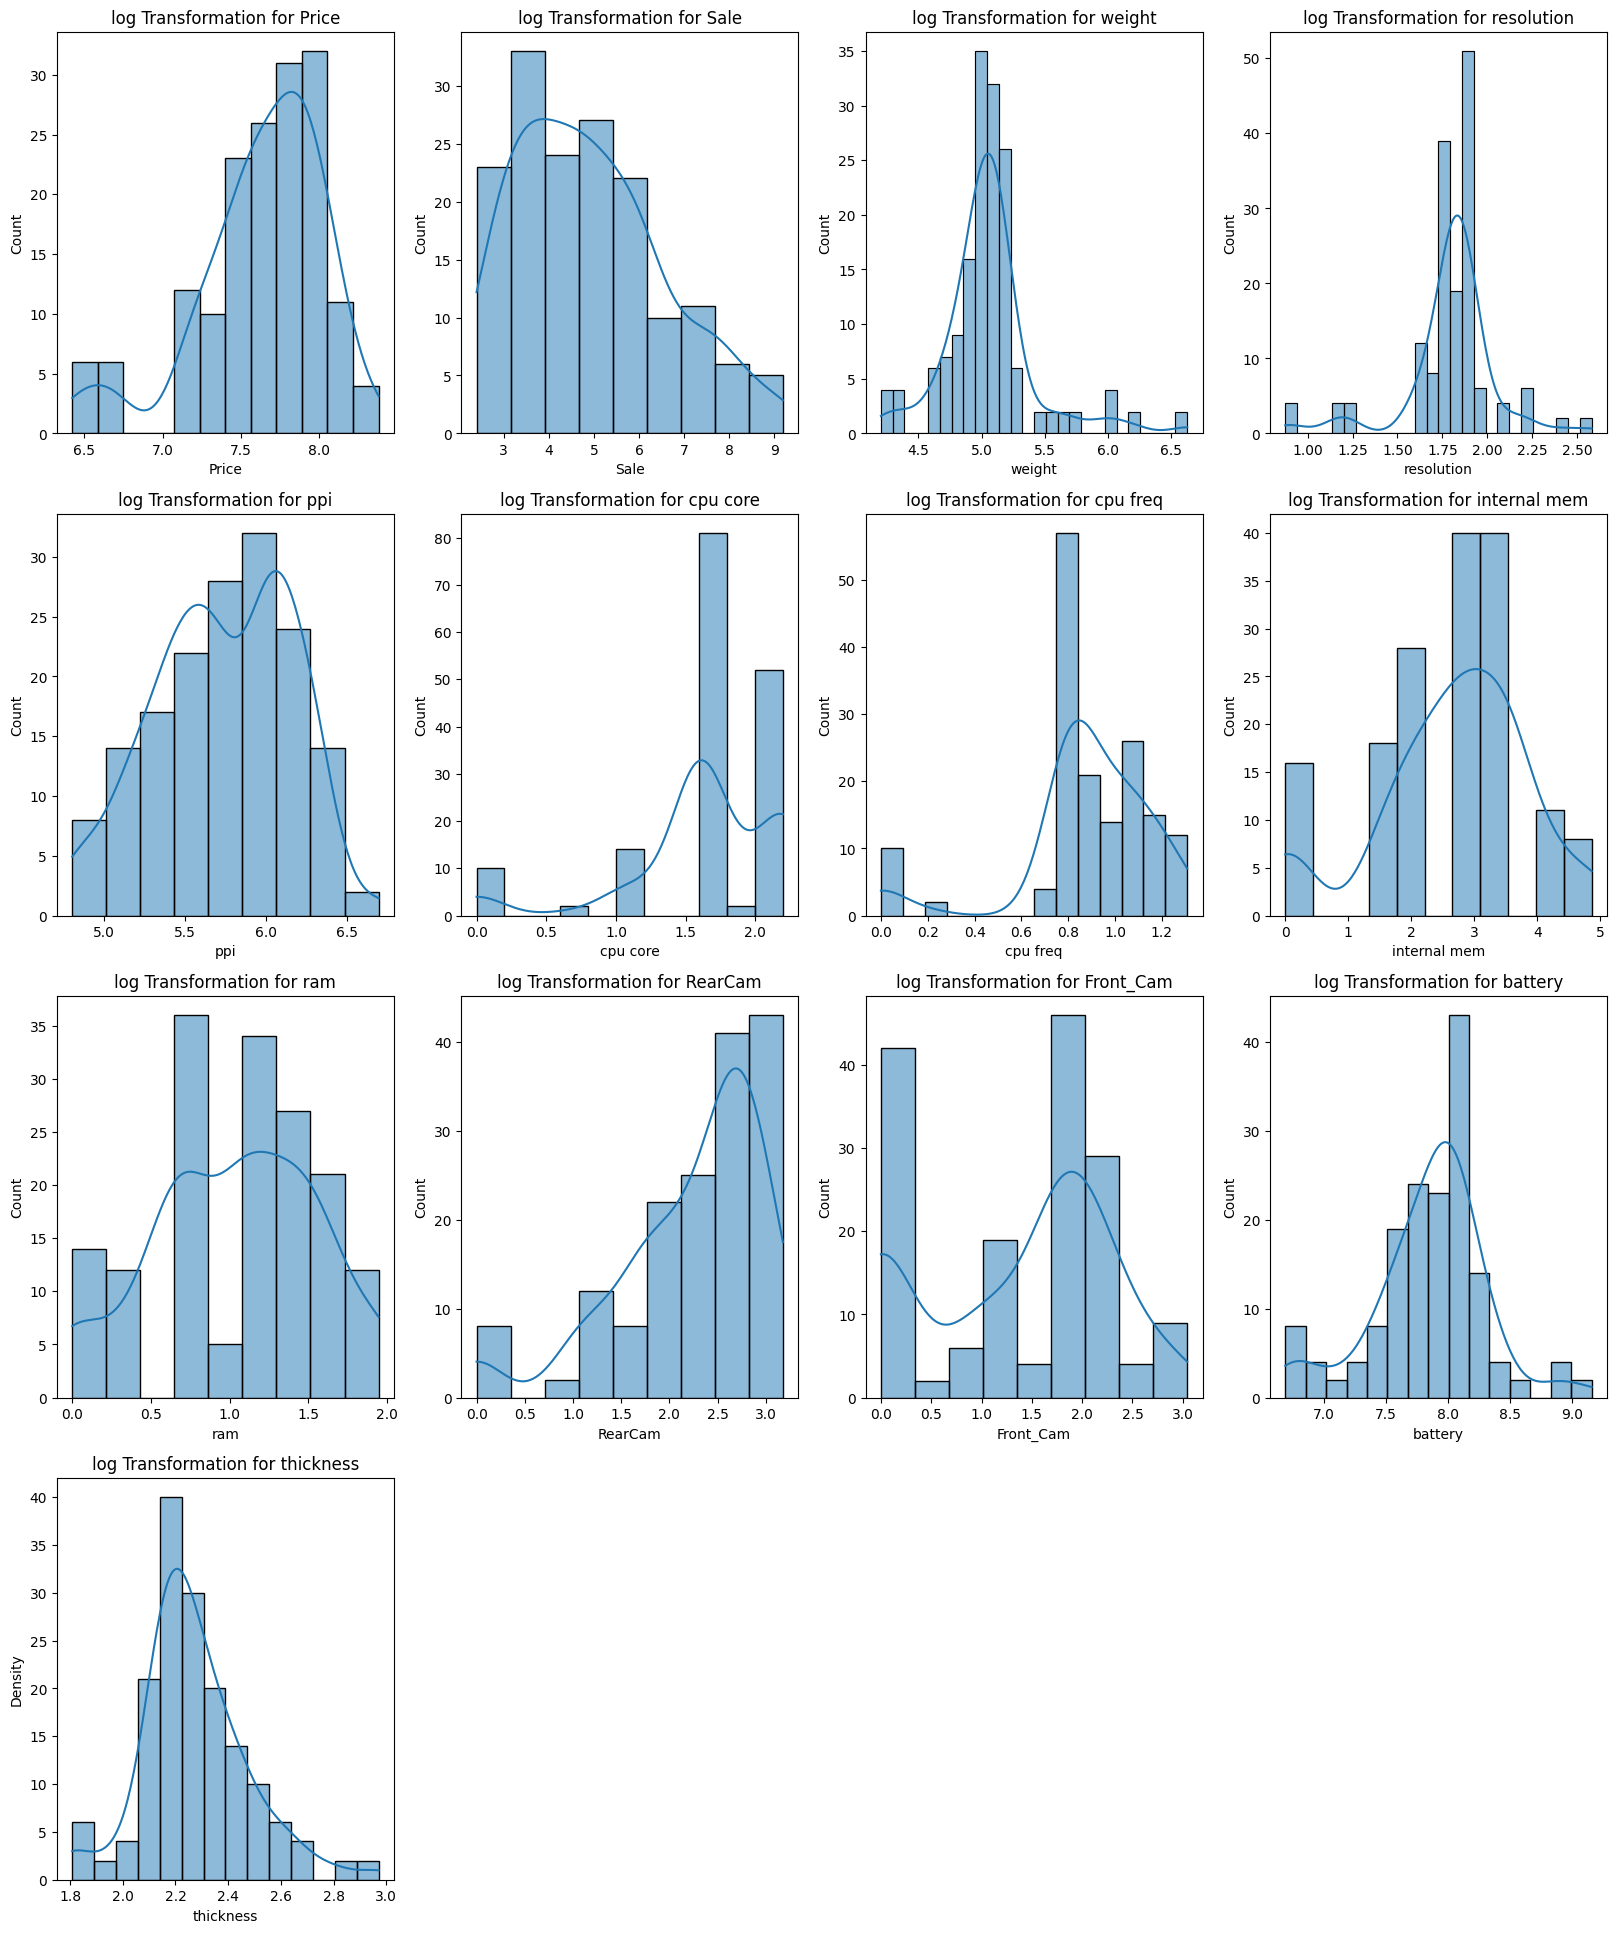

In [21]:
plt.figure(figsize=(20, 24))
for col in df.select_dtypes(include=[np.number]).columns:
    transformed = np.log1p(df[col])
    plt.subplot(4,4,df.columns.get_loc(col) + 1)
    sns.histplot(transformed, kde=True)
    plt.title(f'log Transformation for {col}')
    plt.xlabel(col)
plt.ylabel('Density')
plt.show()

##### iv.	Check/Treat the outliers and do the feature scaling if required.

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    print(f"{col}:")
    print(f"  Q1: {Q1}, Q3: {Q3}")
    print(f"  IQR: {IQR.round(2)}")
    print(f"  Lower Bound: {lower_bound.round(2)}")
    print(f"  Upper Bound: {upper_bound.round(2)}")
    print(f"  Outliers: {outliers}\n")

Price:
  Q1: 1734.0, Q3: 2744.0
  IQR: 1010.0
  Lower Bound: 219.0
  Upper Bound: 4259.0
  Outliers: 2

Sale:
  Q1: 37.0, Q3: 382.0
  IQR: 345.0
  Lower Bound: -480.5
  Upper Bound: 899.5
  Outliers: 24

weight:
  Q1: 134.1, Q3: 170.0
  IQR: 35.9
  Lower Bound: 80.25
  Upper Bound: 223.85
  Outliers: 24

resolution:
  Q1: 4.8, Q3: 5.5
  IQR: 0.7
  Lower Bound: 3.75
  Upper Bound: 6.55
  Outliers: 26

ppi:
  Q1: 233.0, Q3: 428.0
  IQR: 195.0
  Lower Bound: -59.5
  Upper Bound: 720.5
  Outliers: 2

cpu core:
  Q1: 4.0, Q3: 8.0
  IQR: 4.0
  Lower Bound: -2.0
  Upper Bound: 14.0
  Outliers: 0

cpu freq:
  Q1: 1.2, Q3: 1.875
  IQR: 0.68
  Lower Bound: 0.19
  Upper Bound: 2.89
  Outliers: 10

internal mem:
  Q1: 8.0, Q3: 32.0
  IQR: 24.0
  Lower Bound: -28.0
  Upper Bound: 68.0
  Outliers: 8

ram:
  Q1: 1.0, Q3: 3.0
  IQR: 2.0
  Lower Bound: -2.0
  Upper Bound: 6.0
  Outliers: 0

RearCam:
  Q1: 5.0, Q3: 16.0
  IQR: 11.0
  Lower Bound: -11.5
  Upper Bound: 32.5
  Outliers: 0

Front_Cam:
  Q1:

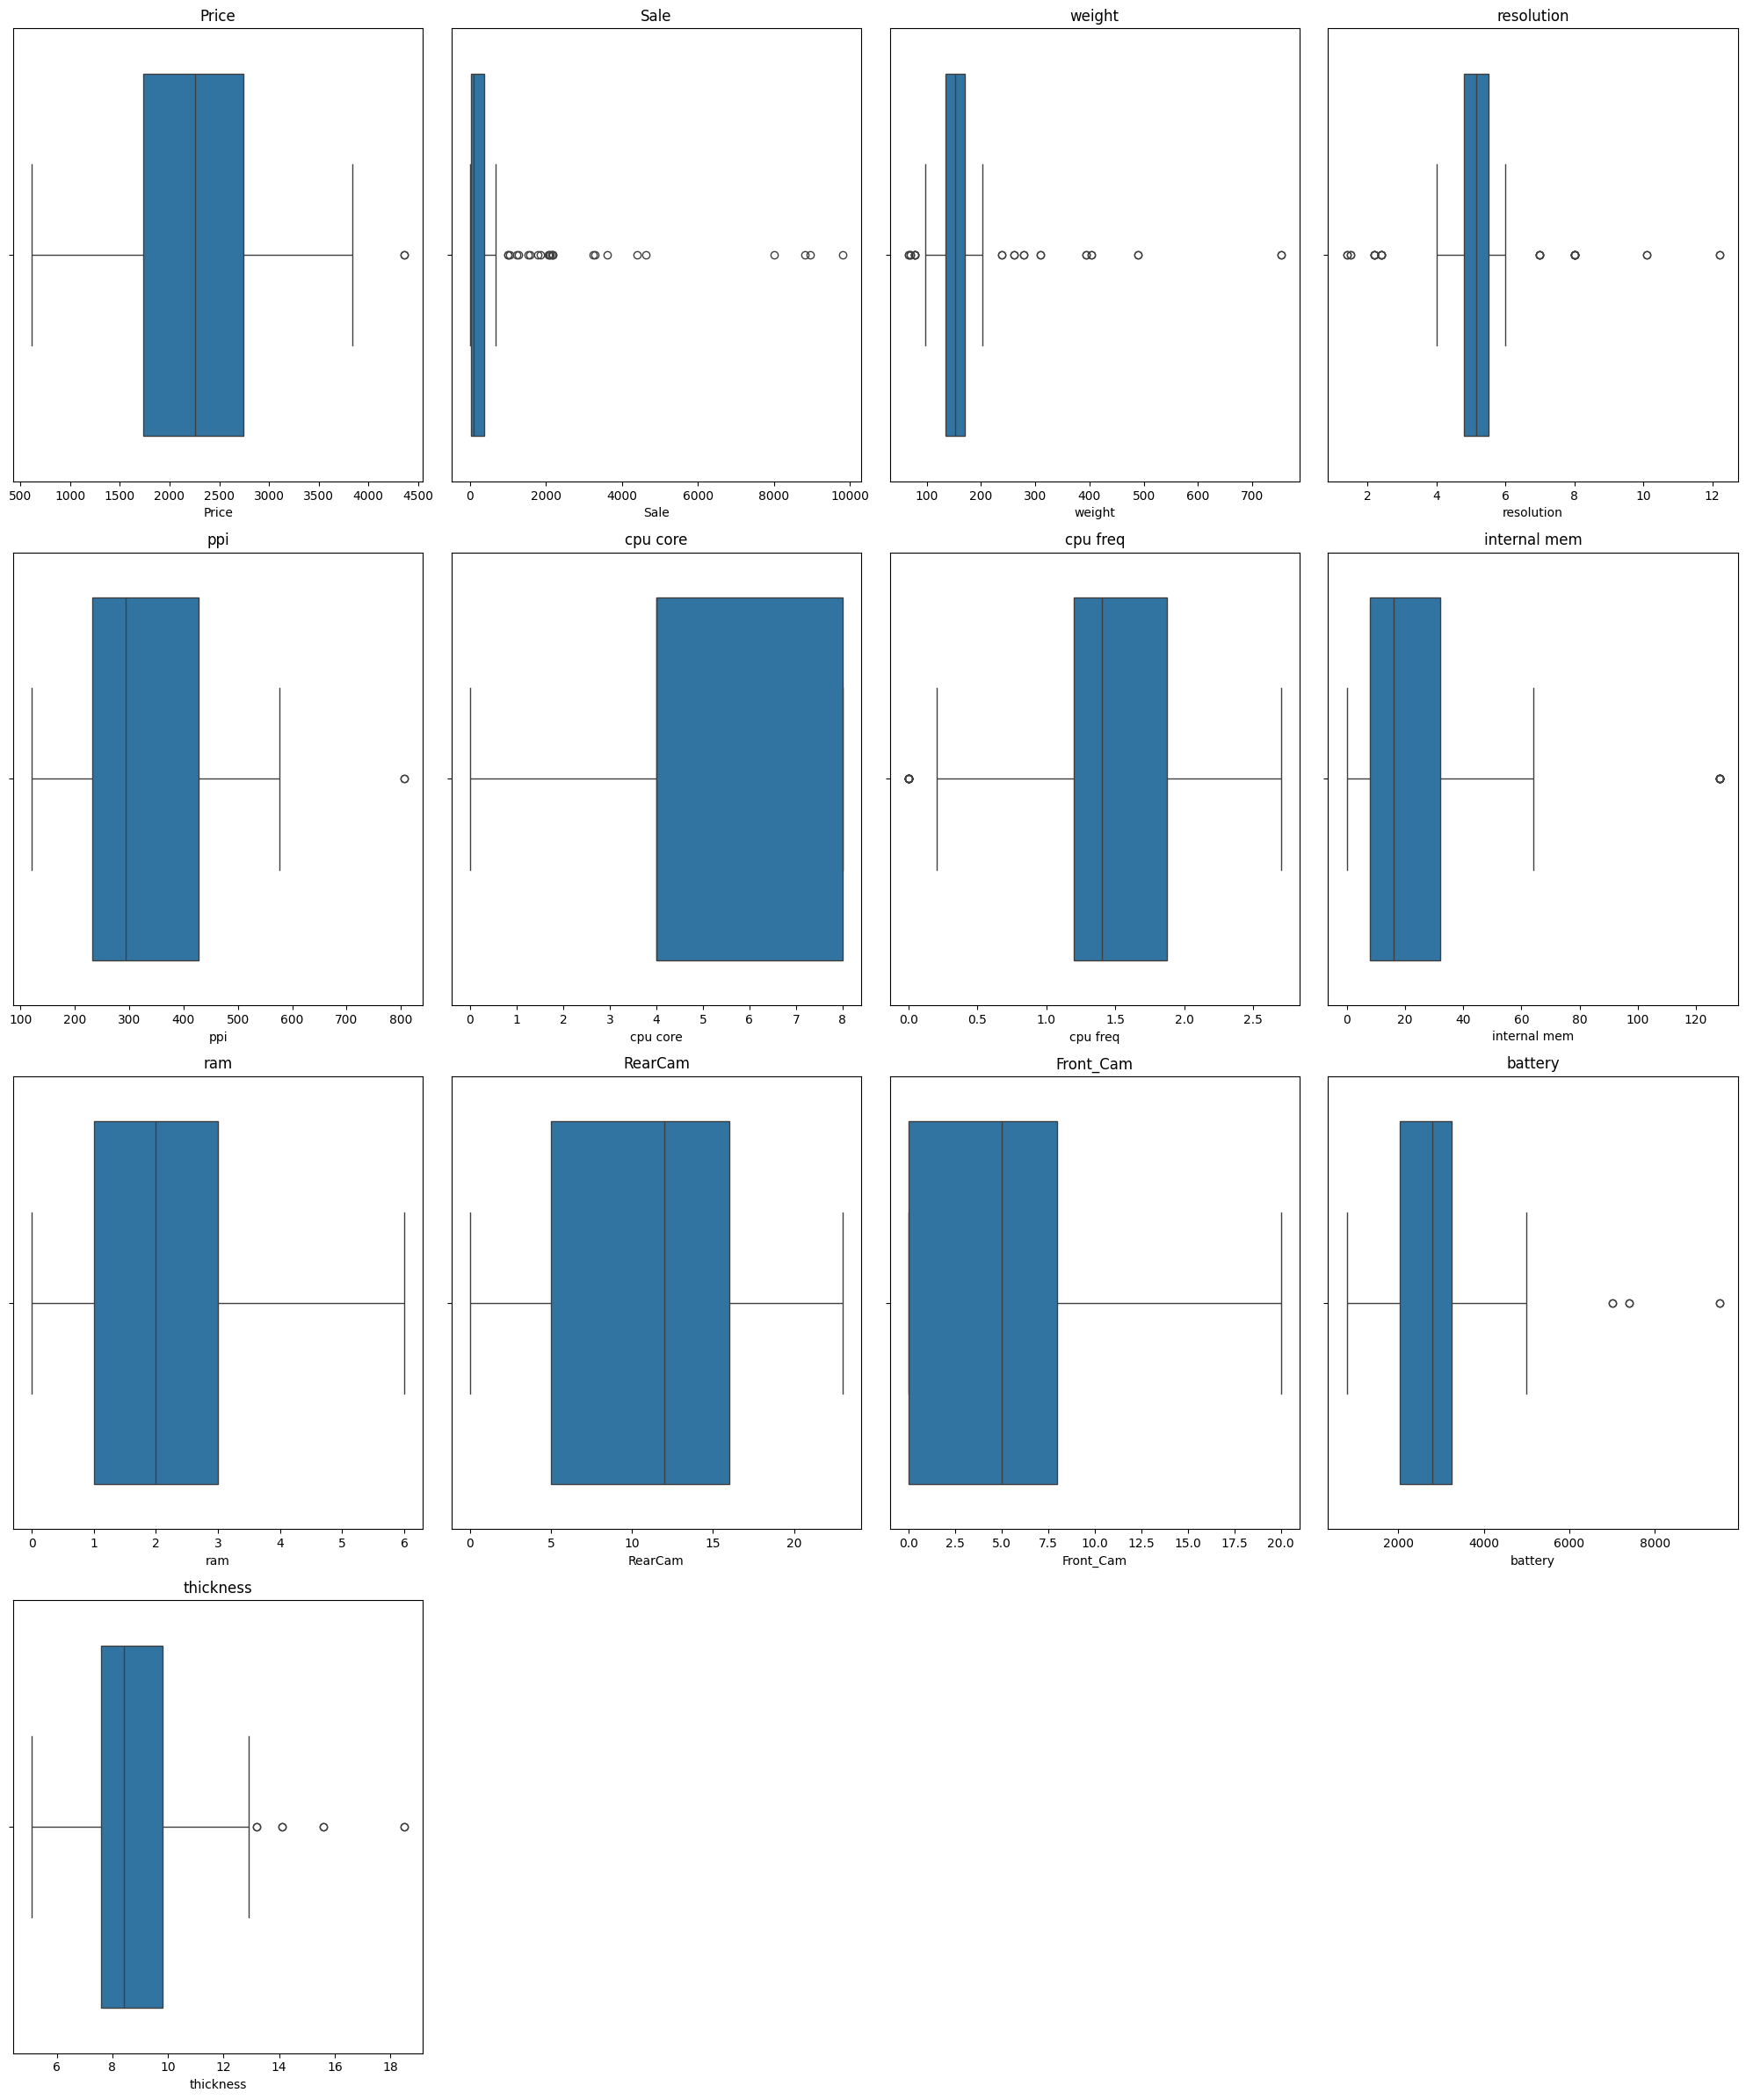

In [23]:
plt.figure(figsize=(20, 24))

for col in df.select_dtypes(include = ['number']).columns:
    plt.subplot(4,4,df.columns.get_loc(col) + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
import numpy as np

def treat_outliers(df):
    df_treated = df.copy()
    numeric_cols = df_treated.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        df_treated[col] = np.where(df_treated[col] > upper_bound, upper_bound,np.where(df_treated[col] < lower_bound, lower_bound, df_treated[col]))
    
    return df_treated
df_treated = treat_outliers(df)

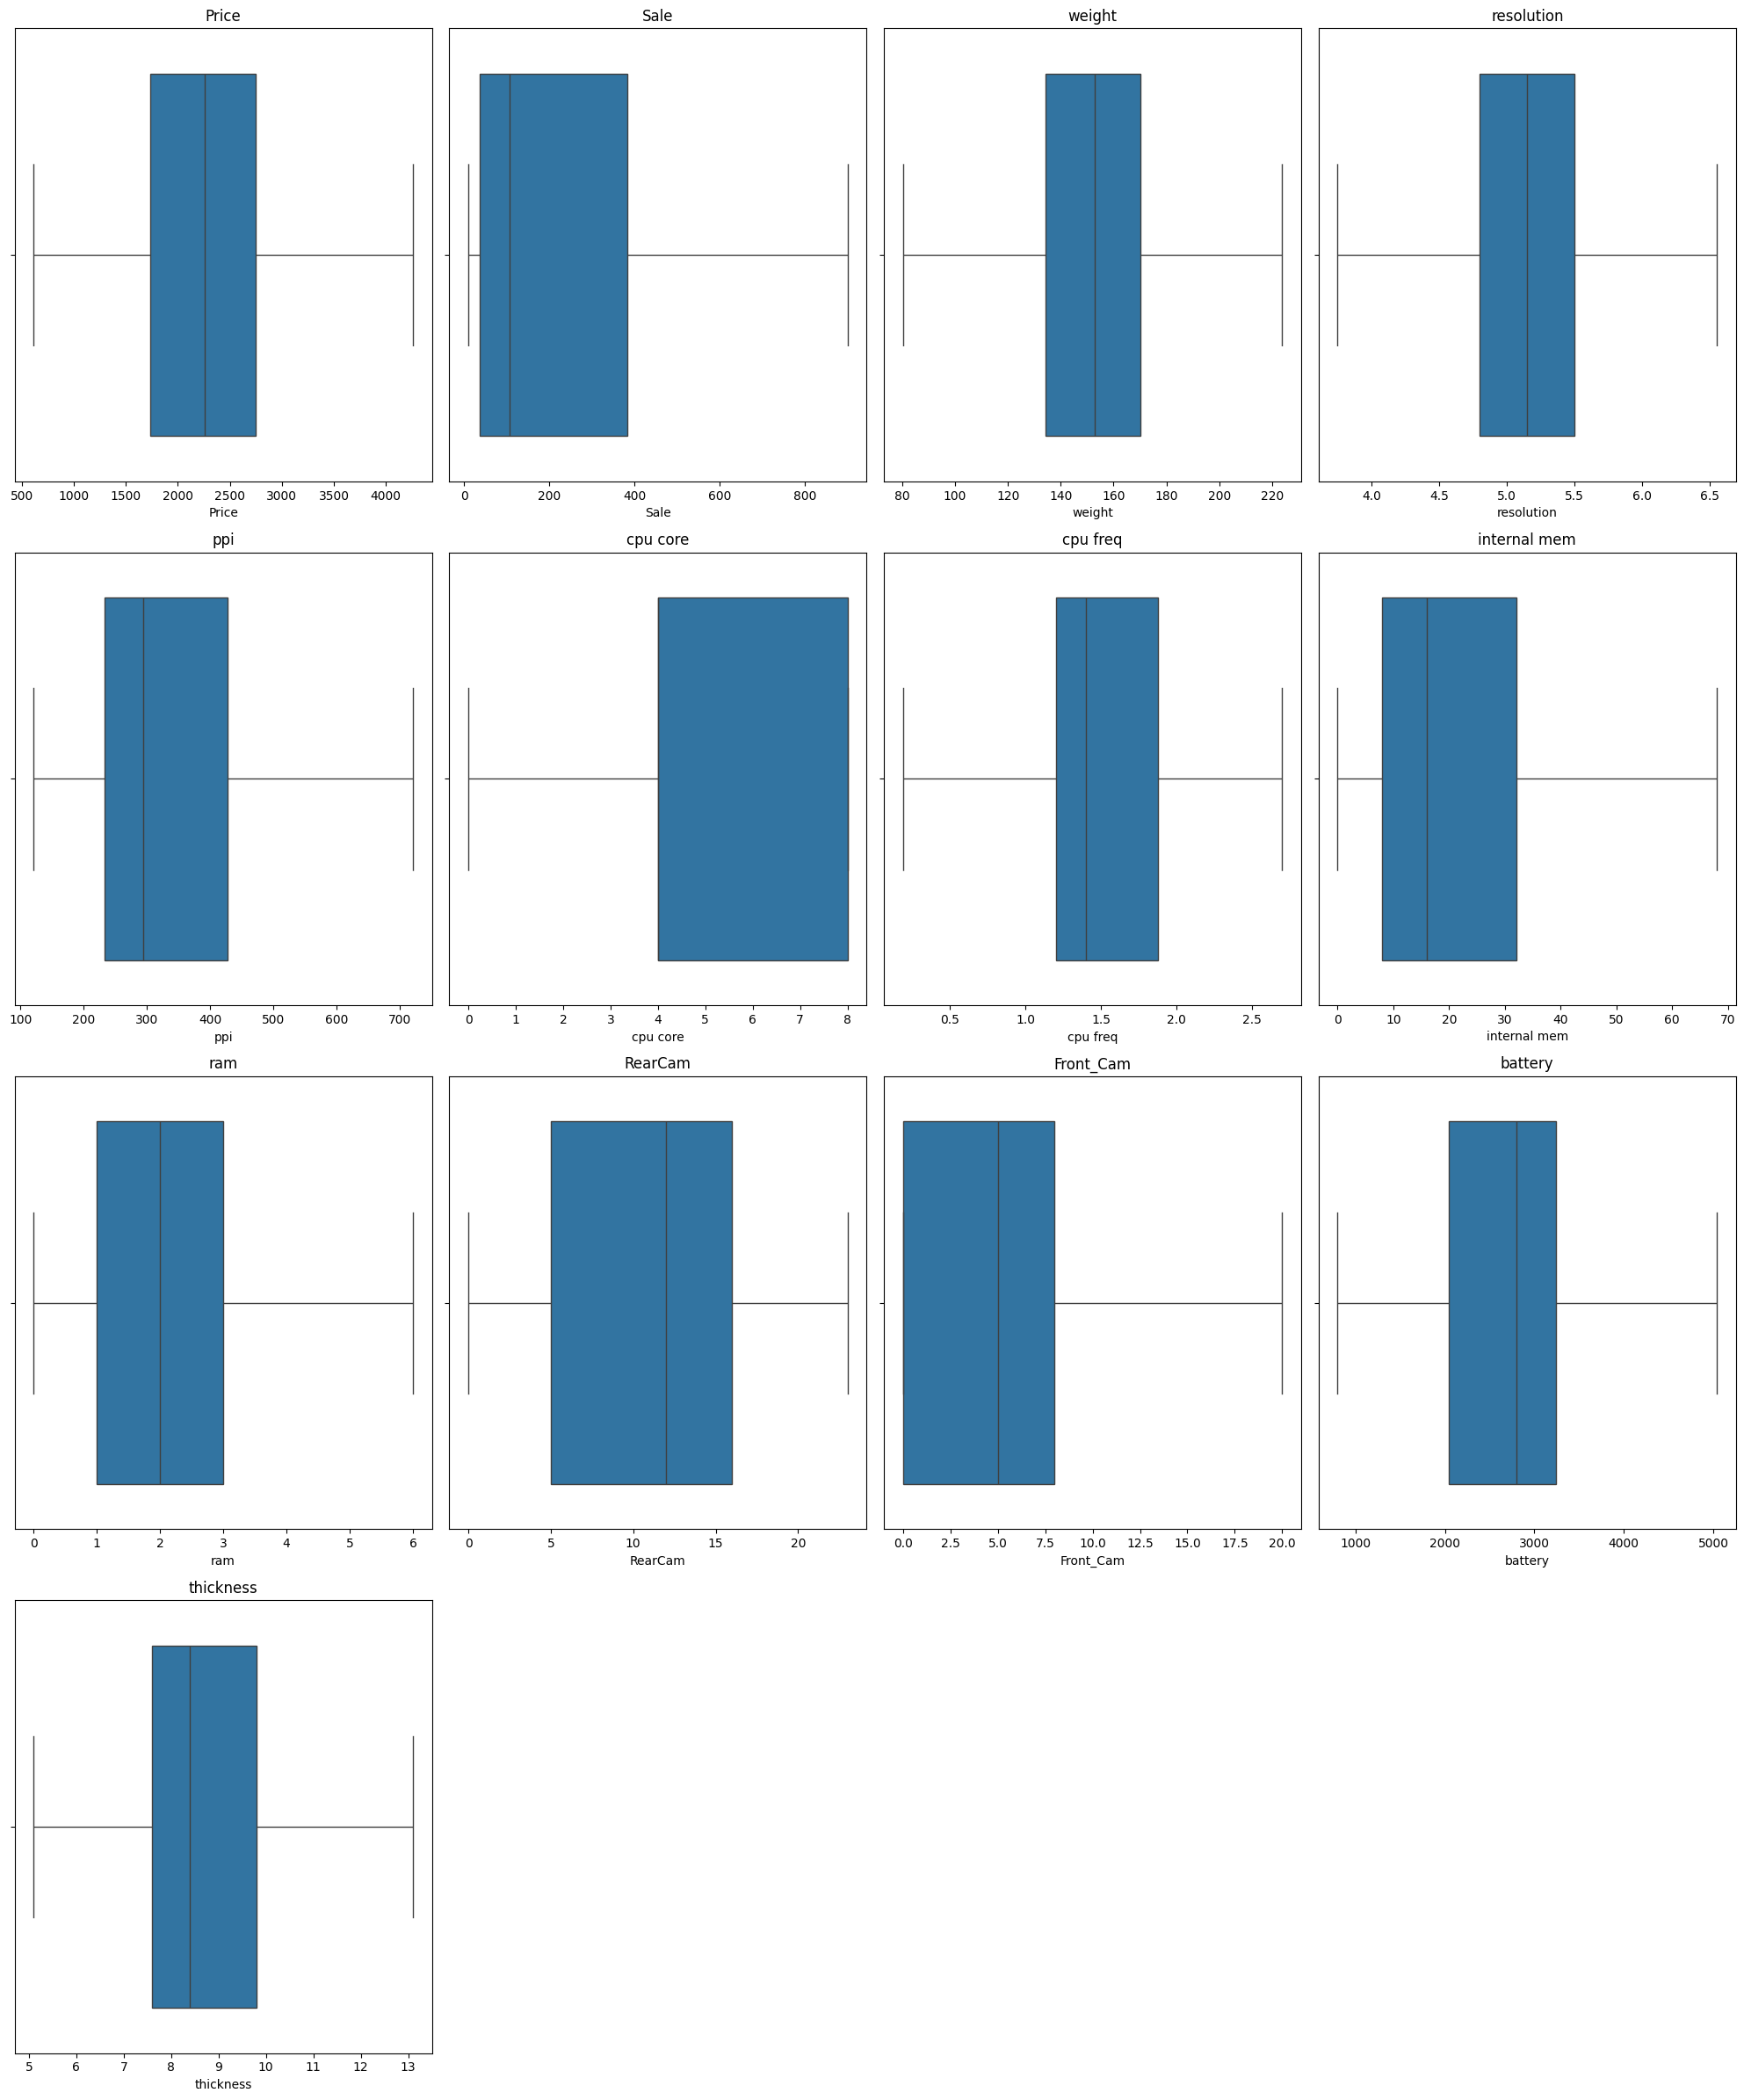

In [30]:
plt.figure(figsize=(20, 24))

for col in df_treated.select_dtypes(include = ['number']).columns:
    plt.subplot(4,4,df_treated.columns.get_loc(col) + 1)
    sns.boxplot(x=df_treated[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### v.	Create a ML model to predict the price of the phone based on the specifications given.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

x= df_treated.drop(columns=["Price"])
y= df_treated["Price"]

scaler_X = StandardScaler()
x_scaled = scaler_X.fit_transform(x)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Flatten to 1D array]

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)  
y_pred = linear_model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Mean Absolute Error: 140.33774087126093
R-squared: 0.9490225168653413


In [32]:
import joblib

joblib.dump(linear_model, 'mobile_price_prediction_model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')

['scaler_X.pkl']